##### Module import

In [1]:
# rp plot설치하려니까 No module named '_curses'발생했는데 밑에 코드로 고침, window환경에서는 curses가 제대로 작동못해서 이렇게 해결해야함
#pip install windows-curses

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tableone import TableOne
from forestplot import forestplot
import forestplot as fp
import rplot as rp

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data import

In [3]:
print(os.getcwd())

c:\Users\Owner\Desktop\윤태준\고용패널\고용패널 파이썬 분석\2023_04_06_변수추가


In [4]:
df = pd.read_csv('2023_04_06_data_step.csv', encoding='cp949')
df.columns

Index(['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a010',
       'a141', 'a144', 'a146', 'd016', 'd131', 'd134', 'd136', 'f073', 'f074',
       'h001', 'q001', 'q015', 'q016', 'q017', 'p001', 'First_Work', 'year',
       'Resign', 'a038', 'a039', 'a043', 'a045', 'g191a046', 'a048', 'a392',
       'a140', 'd130', 'Admission', 'Graduation', 'Cur', 'Cur_Work_date',
       'Start_Work1_date', 'End_Work1_date', 'Work_to_Cur', 'Start_to_End',
       'FirstWorkPeriod', 'LongWork', 'LongWork2', 'major_same', 'major_help',
       'big_company', 'work_sati', 'score', 'q001G', 'p001G', 'provinceG',
       'major_sameG', 'major_helpG', 'majorcatG', 'q015G', 'q016G', 'q017G',
       'big_companyG', 'work_satiG', '나이', '학점', '성별', '건강상태', '결혼상태', '대학지역',
       '전공일치', '본전공', '재학중일자리경험', '삶의만족도_개인', '삶의만족도_관계', '삶의만족도_소속집단', '종사자수',
       '업무만족도'],
      dtype='object')

In [5]:
df_1 = df[['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a010',
       'a141', 'a144', 'a146', 'd016', 'd131', 'd134', 'd136', 'f073', 'f074',
       'h001', 'q001', 'q015', 'q016', 'q017', 'p001', 'First_Work', 'year',
       'Resign', 'Admission', 'Graduation', 'Cur', 'Cur_Work_date',
       'Start_Work1_date', 'End_Work1_date', 'Work_to_Cur', 'Start_to_End',
       'FirstWorkPeriod', 'LongWork', 'LongWork2', 'major_same', 'major_help',
       'big_company', 'work_sati', 'score', 'q001G', 'p001G', 'provinceG',
       'major_sameG', 'major_helpG', 'majorcatG', 'q015G', 'q016G', 'q017G',
       'big_companyG', 'work_satiG',
       '나이', '성별', '건강상태', '결혼상태', '대학지역',  '전공일치', '본전공', '학점',
       '재학중일자리경험', '삶의만족도_개인', '삶의만족도_관계', '삶의만족도_소속집단',
       '종사자수', '업무만족도']].copy()

##### Logistic Regression

In [6]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별, Treatment('여자'))
+ C(건강상태,Treatment('건강하지않다')) + C(결혼상태, Treatment('미혼'))
+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment('맞지않다')) 
+ 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
+ C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
C(업무만족도,Treatment('그렇지않다')) ''', df_1).fit()

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3.index = ['Intercept','나이',
                       "성별_여자(REF:'남자')", 
                       "건강상태_건강하다(REF:'건강하지않다')",
       "건강상태_보통이다(REF:'건강하지않다')",
       "결혼상태_기혼(REF:'미혼')", "대학지역_수도권(REF:'비수도권')",
       "전공일치_보통이다(REF:'맞지않다')",
       "전공일치_잘맞다(REF:'맞지않다')",
       '학점', "재학중일자리경험_있다(REF:'없다')",
       "삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "업무만족도_그렇다(REF:'그렇지않다')",
       "업무만족도_보통이다(REF:'그렇지않다')"]
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.518176
         Iterations 6
==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.000038,0.000011,0.000129
나이,1.271118,1.092954,1.478324
성별_여자(REF:'남자'),1.112945,0.884178,1.400902
건강상태_건강하다(REF:'건강하지않다'),1.031208,0.810594,1.311864
건강상태_보통이다(REF:'건강하지않다'),1.301393,0.856991,1.976244
결혼상태_기혼(REF:'미혼'),1.269382,1.115660,1.444284
대학지역_수도권(REF:'비수도권'),1.702945,1.440854,2.012710
전공일치_보통이다(REF:'맞지않다'),2.447567,2.098734,2.854380
전공일치_잘맞다(REF:'맞지않다'),0.867928,0.761147,0.989690
학점,1.433478,1.088294,1.888146


##### Using forest plot package drawing plot
- Condition: group by gender

In [7]:
odds_copy = odds_ratios_3.copy()
odds_copy

,OR,Lower CI,Upper CI
Intercept,0.000038,0.000011,0.000129
나이,1.271118,1.092954,1.478324
성별_여자(REF:'남자'),1.112945,0.884178,1.400902
건강상태_건강하다(REF:'건강하지않다'),1.031208,0.810594,1.311864
건강상태_보통이다(REF:'건강하지않다'),1.301393,0.856991,1.976244
결혼상태_기혼(REF:'미혼'),1.269382,1.115660,1.444284
대학지역_수도권(REF:'비수도권'),1.702945,1.440854,2.012710
전공일치_보통이다(REF:'맞지않다'),2.447567,2.098734,2.854380
전공일치_잘맞다(REF:'맞지않다'),0.867928,0.761147,0.989690
학점,1.433478,1.088294,1.888146


In [ ]:
fp.forestplot(model_3,  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              moerror="moerror",  # columns containing conf. int. margin of error
              varlabel="label",  # column containing variable label
              groupvar="성별",  # Add variable groupings 
              # group ordering
              group_order=["labor factors", "occupation", "age", "health factors", 
                           "family factors", "area of residence", "other factors"],
              sort=True  # sort in ascending order (sorts within group if group is specified)               
              )

In [11]:
# odds_ratios_3.index = ['Intercept','나이',
#                        "성별_여자(REF:'남자')", 
#                        "건강상태_건강하다(REF:'건강하지않다')",
#        "건강상태_보통이다(REF:'건강하지않다')",
#        "결혼상태_기혼(REF:'미혼')", "대학지역_수도권(REF:'비수도권')",
#        "전공일치_보통이다(REF:'맞지않다')",
#        "전공일치_잘맞다(REF:'맞지않다')",
#        '학점', "재학중일자리경험_있다(REF:'없다')",
#        "삶의만족도_개인_그렇다(REF:'그렇지않다')",
#        "삶의만족도_개인_보통이다(REF:'그렇지않다')",
#        "삶의만족도_관계_그렇다(REF:'그렇지않다')",
#        "삶의만족도_관계_보통이다(REF:'그렇지않다')",
#        "삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
#        "삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
#        "업무만족도_그렇다(REF:'그렇지않다')",
#        "업무만족도_보통이다(REF:'그렇지않다')"]

##### 성별 나누기

In [9]:
man = df_1[df_1['성별']=='남자']
lady = df_1[df_1['성별']=='여자']

###### 남자 로지스틱 

In [10]:
model_3_man = sm.Logit.from_formula('''LongWork2 ~ 나이
+ C(건강상태,Treatment('건강하지않다')) + C(결혼상태, Treatment('미혼'))
+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment('맞지않다')) 
+ 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
+ C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
C(업무만족도,Treatment('그렇지않다')) ''', man).fit()
model_3_man.summary()

Optimization terminated successfully.
         Current function value: 0.560993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2665
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           17
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.1327
Time:                        13:50:29   Log-Likelihood:                -1495.0
converged:                       True   LL-Null:                       -1723.7
Covariance Type:            nonrobust   LLR p-value:                 1.747e-86
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -9.5637      0.913    -10.471      0.000     -11.354      -7.774
C(건강상태, Treatment('건강하지않다'))[T.건강하다]          0.0316      0.179      0.177      0.860      -0.319       0.382
C(건강상태, Treatment('건강하지않다'))[T.보통이다]          0.0411      0.191      0.215      0.830      -0.333       0.415
C(결혼상태, Treatment('미혼'))[T.기혼]                1.4904      0.369      4.037      0.000       0.767       2.214
C(대학지역, Treatment('비수도권'))[T.수도권]             0.2408      0.091      2.642      0.008       0.062       0.419
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.8140      0.117      6.946      0.000       0.584       1.044
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             1.3316      0.109     12.211      0.000       1.118       1.545
C(재학중일자리경험, Treatment('없다'))[T.있다]           -0.1360      0.091     -1.501      0.133      -0.314       0.042
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]        0.3966      0.203      1.955      0.051      -0.001       0.794
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]       0.0876      0.216      0.407      0.684      -0.335       0.510
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]        0.4456      0.256      1.739      0.082      -0.057       0.948
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]       0.2246      0.258      0.870      0.384      -0.281       0.731
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]     -0.5019      0.240     -2.090      0.037      -0.973      -0.031
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -0.1698      0.234     -0.724      0.469      -0.629       0.290
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]           1.0027      0.150      6.665      0.000       0.708       1.298
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]          0.4344      0.153      2.834      0.005       0.134       0.735
나이                                            0.2670      0.031      8.524      0.000       0.206       0.328
학점                                           -0.0022      0.100     -0.022      0.982      -0.198       0.193
=============================================================================================================
"""

In [14]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3_man = pd.DataFrame(
    {
        "OR": model_3_man.params,
        "Lower CI": model_3_man.conf_int()[0],
        "Upper CI": model_3_man.conf_int()[1],
    }
)
odds_ratios_3_man = np.exp(odds_ratios_3_man)

odds_ratios_3_man.index = ['Intercept',
       "건강상태_건강하다(REF:'건강하지않다')",
       "건강상태_보통이다(REF:'건강하지않다')",
       "결혼상태_기혼(REF:'미혼')", "대학지역_수도권(REF:'비수도권')",
       "전공일치_보통이다(REF:'맞지않다')",
       "전공일치_잘맞다(REF:'맞지않다')", "재학중일자리경험_있다(REF:'없다')",
       "삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "업무만족도_그렇다(REF:'그렇지않다')",
       "업무만족도_보통이다(REF:'그렇지않다')",'나이',
       '학점']

odds_ratios_3_man

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.000070,0.000012,0.000421
건강상태_건강하다(REF:'건강하지않다'),1.032097,0.727161,1.464907
건강상태_보통이다(REF:'건강하지않다'),1.041908,0.716643,1.514802
결혼상태_기혼(REF:'미혼'),4.439068,2.152755,9.153536
대학지역_수도권(REF:'비수도권'),1.272233,1.064135,1.521025
전공일치_보통이다(REF:'맞지않다'),2.256859,1.793698,2.839615
전공일치_잘맞다(REF:'맞지않다'),3.787023,3.058290,4.689398
재학중일자리경험_있다(REF:'없다'),0.872825,0.730812,1.042435
삶의만족도_개인_그렇다(REF:'그렇지않다'),1.486770,0.998988,2.212723
삶의만족도_개인_보통이다(REF:'그렇지않다'),1.091578,0.715485,1.665364


In [13]:
model_3_lady = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(건강상태,Treatment('건강하지않다')) 
    + C(결혼상태, Treatment('미혼'))+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', lady).fit()
model_3_lady.summary()

Optimization terminated successfully.
         Current function value: 0.465118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2903
Model:                          Logit   Df Residuals:                     2885
Method:                           MLE   Df Model:                           17
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                 0.06820
Time:                        21:53:03   Log-Likelihood:                -1350.2
converged:                       True   LL-Null:                       -1449.1
Covariance Type:            nonrobust   LLR p-value:                 8.543e-33
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   -10.6480      0.918    -11.600      0.000     -12.447      -8.849
C(건강상태, Treatment('건강하지않다'))[T.건강하다]          0.2205      0.160      1.382      0.167      -0.092       0.533
C(건강상태, Treatment('건강하지않다'))[T.보통이다]          0.0536      0.163      0.328      0.743      -0.267       0.374
C(결혼상태, Treatment('미혼'))[T.기혼]               -0.7965      0.346     -2.303      0.021      -1.474      -0.119
C(대학지역, Treatment('비수도권'))[T.수도권]             0.1838      0.098      1.879      0.060      -0.008       0.376
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.1936      0.125      1.545      0.122      -0.052       0.439
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.3801      0.115      3.301      0.001       0.154       0.606
C(재학중일자리경험, Treatment('없다'))[T.있다]           -0.1356      0.102     -1.324      0.186      -0.336       0.065
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]        0.3231      0.201      1.604      0.109      -0.072       0.718
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]       0.2462      0.205      1.201      0.230      -0.156       0.648
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]        0.4325      0.245      1.762      0.078      -0.048       0.913
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]       0.3236      0.249      1.301      0.193      -0.164       0.811
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]     -0.6022      0.203     -2.970      0.003      -1.000      -0.205
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -0.6938      0.198     -3.499      0.000      -1.082      -0.305
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]           0.7107      0.148      4.807      0.000       0.421       1.000
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]          0.3426      0.152      2.248      0.025       0.044       0.641
나이                                            0.3445      0.033     10.543      0.000       0.280       0.409
학점                                           -0.1025      0.102     -1.001      0.317      -0.303       0.098
=============================================================================================================
"""

In [14]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3_lady = pd.DataFrame(
    {
        "OR": model_3_lady.params,
        "Lower CI": model_3_lady.conf_int()[0],
        "Upper CI": model_3_lady.conf_int()[1],
    }
)
odds_ratios_3_lady = np.exp(odds_ratios_3_lady)
odds_ratios_3_lady

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.000024,0.000004,0.000144
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.246739,0.911970,1.704397
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.055040,0.765986,1.453172
"C(결혼상태, Treatment('미혼'))[T.기혼]",0.450921,0.228952,0.888088
"C(대학지역, Treatment('비수도권'))[T.수도권]",1.201822,0.992078,1.455911
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.213599,0.949290,1.551499
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.462475,1.166968,1.832814
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.873171,0.714325,1.067340
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",1.381422,0.930907,2.049965
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",1.279181,0.855908,1.911778


##### forest plot

In [ ]:
# # 오즈비 순서대로 

# # Define the data
# data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# # Sort the data by the odds ratio
# data = sorted(data, key=lambda x: x[1], reverse=True)

# # Set the figure size
# plt.figure(figsize=(17, 13))

# # Plot the data
# plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black', 
#              markersize=10, markerfacecolor='blue')

# # Add the vertical line
# plt.axvline(x=1, color='red', linestyle='--')

# # Add the labels and title
# plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
# plt.xlabel('Odds Ratio', fontsize=15)
# plt.ylabel('Variable', fontsize=15)
# plt.title('Forest Plot of Odds Ratios', fontsize=15)

# # Show the plot
# plt.show()

##### 인덱스 재설정

In [16]:
odds_ratios_3_man.index = ['Intercept', "남자_건강상태_건강하다(REF:'건강하지않다')",
       "남자_건강상태_보통이다(REF:'건강하지않다')",
       "남자_결혼상태_기혼(REF:'미혼')", "남자_대학지역_수도권(REF:'비수도권')",
       "남자_전공일치_보통이다(REF:'맞지않다')",
       "남자_전공일치_잘맞다(REF:'맞지않다')",
       "남자_재학중일자리경험_있다(REF:'없다')",
       "남자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "남자_업무만족도_그렇다(REF:'그렇지않다')",
       "남자_업무만족도_보통이다(REF:'그렇지않다')", '남자_나이', '남자_학점']

In [17]:
odds_ratios_3_lady.index = ['Intercept', "여자_건강상태_건강하다(REF:'건강하지않다')",
       "여자_건강상태_보통이다(REF:'건강하지않다')",
       "여자_결혼상태_기혼(REF:'미혼')", "여자_대학지역_수도권(REF:'비수도권')",
       "여자_전공일치_보통이다(REF:'맞지않다')",
       "여자_전공일치_잘맞다(REF:'맞지않다')",
       "여자_재학중일자리경험_있다(REF:'없다')",
       "여자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "여자_업무만족도_그렇다(REF:'그렇지않다')",
       "여자_업무만족도_보통이다(REF:'그렇지않다')", '여자_나이', '여자_학점']

In [18]:
odds_ratios_3_sex = pd.concat([odds_ratios_3_man,odds_ratios_3_lady])
odds_ratios_3_sex

,OR,Lower CI,Upper CI
Intercept,0.000070,0.000012,0.000421
남자_건강상태_건강하다(REF:'건강하지않다'),1.032097,0.727161,1.464907
남자_건강상태_보통이다(REF:'건강하지않다'),1.041908,0.716643,1.514802
남자_결혼상태_기혼(REF:'미혼'),4.439068,2.152755,9.153536
남자_대학지역_수도권(REF:'비수도권'),1.272233,1.064135,1.521025
남자_전공일치_보통이다(REF:'맞지않다'),2.256859,1.793698,2.839615
남자_전공일치_잘맞다(REF:'맞지않다'),3.787023,3.058290,4.689398
남자_재학중일자리경험_있다(REF:'없다'),0.872825,0.730812,1.042435
남자_삶의만족도_개인_그렇다(REF:'그렇지않다'),1.486770,0.998988,2.212723
남자_삶의만족도_개인_보통이다(REF:'그렇지않다'),1.091578,0.715485,1.665364


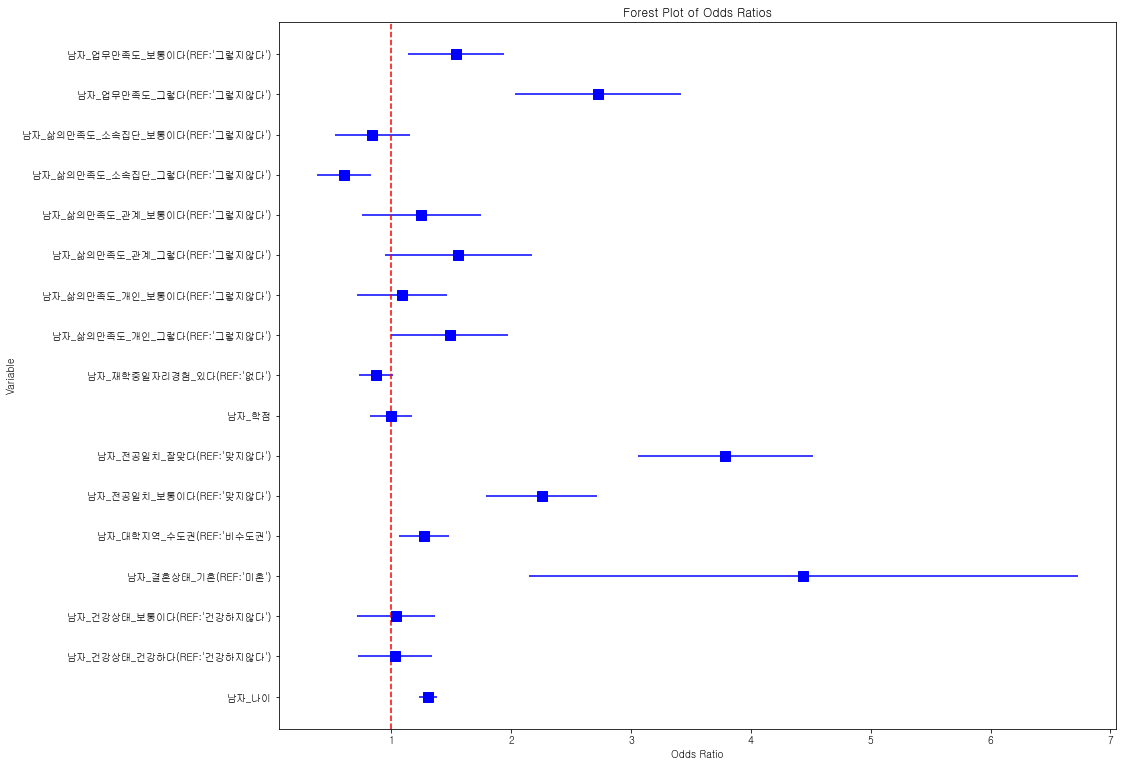

In [19]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['남자_나이', "남자_건강상태_건강하다(REF:'건강하지않다')",
       "남자_건강상태_보통이다(REF:'건강하지않다')",
       "남자_결혼상태_기혼(REF:'미혼')", "남자_대학지역_수도권(REF:'비수도권')",
       "남자_전공일치_보통이다(REF:'맞지않다')",
       "남자_전공일치_잘맞다(REF:'맞지않다')",
       '남자_학점', "남자_재학중일자리경험_있다(REF:'없다')",
       "남자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "남자_업무만족도_그렇다(REF:'그렇지않다')",
       "남자_업무만족도_보통이다(REF:'그렇지않다')"]

# Define the data in the desired order
data = [(var, odds_ratios_3_man.loc[var, "OR"], odds_ratios_3_man.loc[var, "Lower CI"], odds_ratios_3_man.loc[var, "Upper CI"]) for var in var_order]

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='blue',
             markersize=10, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data])
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Forest Plot of Odds Ratios')

# Show the plot
plt.show()

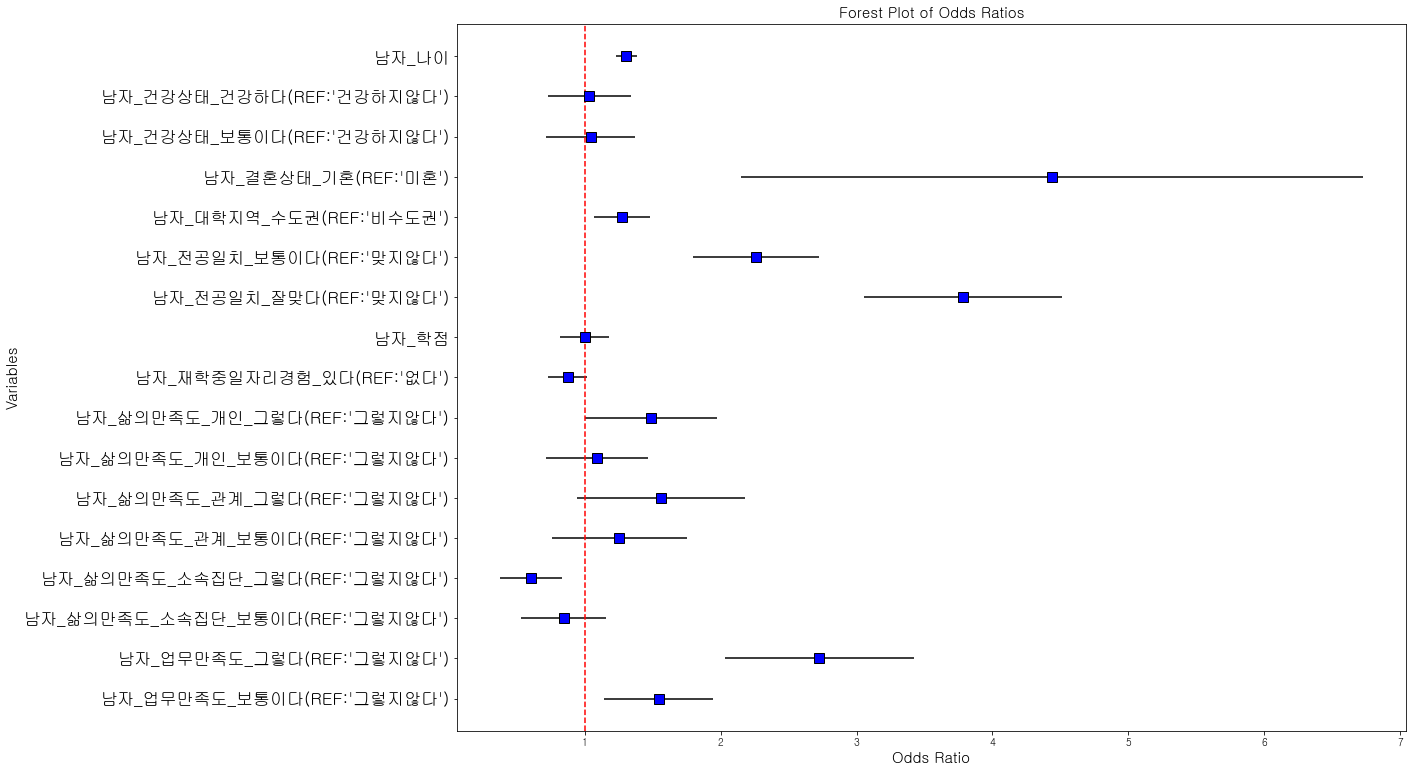

In [20]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['남자_나이', "남자_건강상태_건강하다(REF:'건강하지않다')",
       "남자_건강상태_보통이다(REF:'건강하지않다')",
       "남자_결혼상태_기혼(REF:'미혼')", "남자_대학지역_수도권(REF:'비수도권')",
       "남자_전공일치_보통이다(REF:'맞지않다')",
       "남자_전공일치_잘맞다(REF:'맞지않다')",
       '남자_학점', "남자_재학중일자리경험_있다(REF:'없다')",
       "남자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "남자_업무만족도_그렇다(REF:'그렇지않다')",
       "남자_업무만족도_보통이다(REF:'그렇지않다')"]

var_order_reversed = var_order[::-1] # 역순 정렬

# Define the data in the desired order
data = [(var, odds_ratios_3_man.loc[var, "OR"], odds_ratios_3_man.loc[var, "Lower CI"], odds_ratios_3_man.loc[var, "Upper CI"]) for var in var_order_reversed]

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s',
             color='black', 
             markersize=10, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variables', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize= 15)

# Show the plot
plt.show()

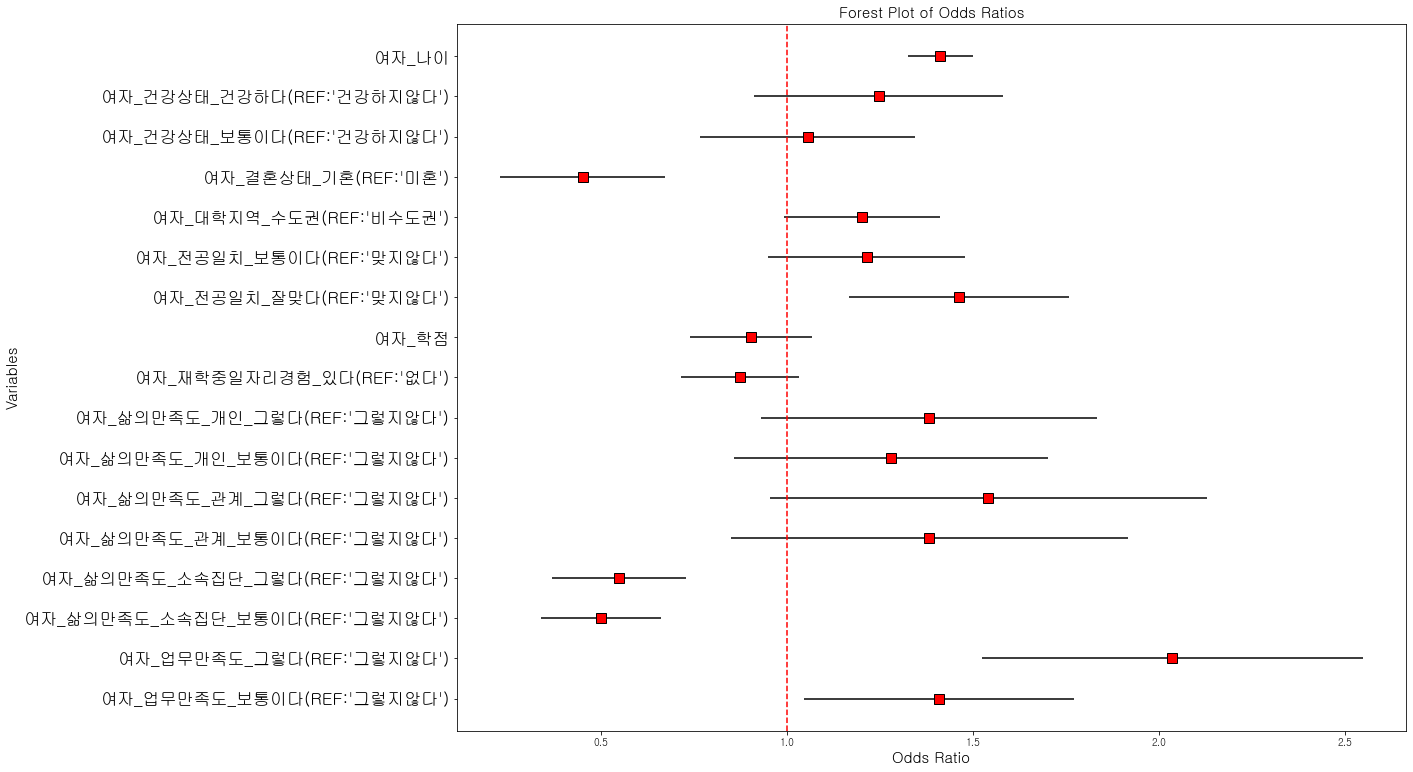

In [34]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['여자_나이', "여자_건강상태_건강하다(REF:'건강하지않다')",
       "여자_건강상태_보통이다(REF:'건강하지않다')",
       "여자_결혼상태_기혼(REF:'미혼')", "여자_대학지역_수도권(REF:'비수도권')",
       "여자_전공일치_보통이다(REF:'맞지않다')",
       "여자_전공일치_잘맞다(REF:'맞지않다')",
       '여자_학점', "여자_재학중일자리경험_있다(REF:'없다')",
       "여자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "여자_업무만족도_그렇다(REF:'그렇지않다')",
       "여자_업무만족도_보통이다(REF:'그렇지않다')"]

var_order_reversed = var_order[::-1] # 역순 정렬

# Define the data in the desired order
data = [(var, odds_ratios_3_lady.loc[var, "OR"], odds_ratios_3_lady.loc[var, "Lower CI"],
          odds_ratios_3_lady.loc[var, "Upper CI"]) for var in var_order_reversed]

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s',
             color='black', 
             markersize=10, markerfacecolor='red')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variables', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize= 15)

# Show the plot
plt.show()

In [22]:
# Define the desired order of variables for men
var_order = ['남자_나이', "남자_건강상태_건강하다(REF:'건강하지않다')",
       "남자_건강상태_보통이다(REF:'건강하지않다')",
       "남자_결혼상태_기혼(REF:'미혼')", "남자_대학지역_수도권(REF:'비수도권')",
       "남자_전공일치_보통이다(REF:'맞지않다')",
       "남자_전공일치_잘맞다(REF:'맞지않다')",
       '남자_학점', "남자_재학중일자리경험_있다(REF:'없다')",
       "남자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "남자_업무만족도_그렇다(REF:'그렇지않다')",
       "남자_업무만족도_보통이다(REF:'그렇지않다')"]

# Define the desired order of variables for women
var_order2 = ['여자_나이', "여자_건강상태_건강하다(REF:'건강하지않다')",
       "여자_건강상태_보통이다(REF:'건강하지않다')",
       "여자_결혼상태_기혼(REF:'미혼')", "여자_대학지역_수도권(REF:'비수도권')",
       "여자_전공일치_보통이다(REF:'맞지않다')",
       "여자_전공일치_잘맞다(REF:'맞지않다')",
       '여자_학점', "여자_재학중일자리경험_있다(REF:'없다')",
       "여자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "여자_업무만족도_그렇다(REF:'그렇지않다')",
       "여자_업무만족도_보통이다(REF:'그렇지않다')"]

var_order_reversed = var_order[::-1]
var_order2_reversed = var_order2[::-1]

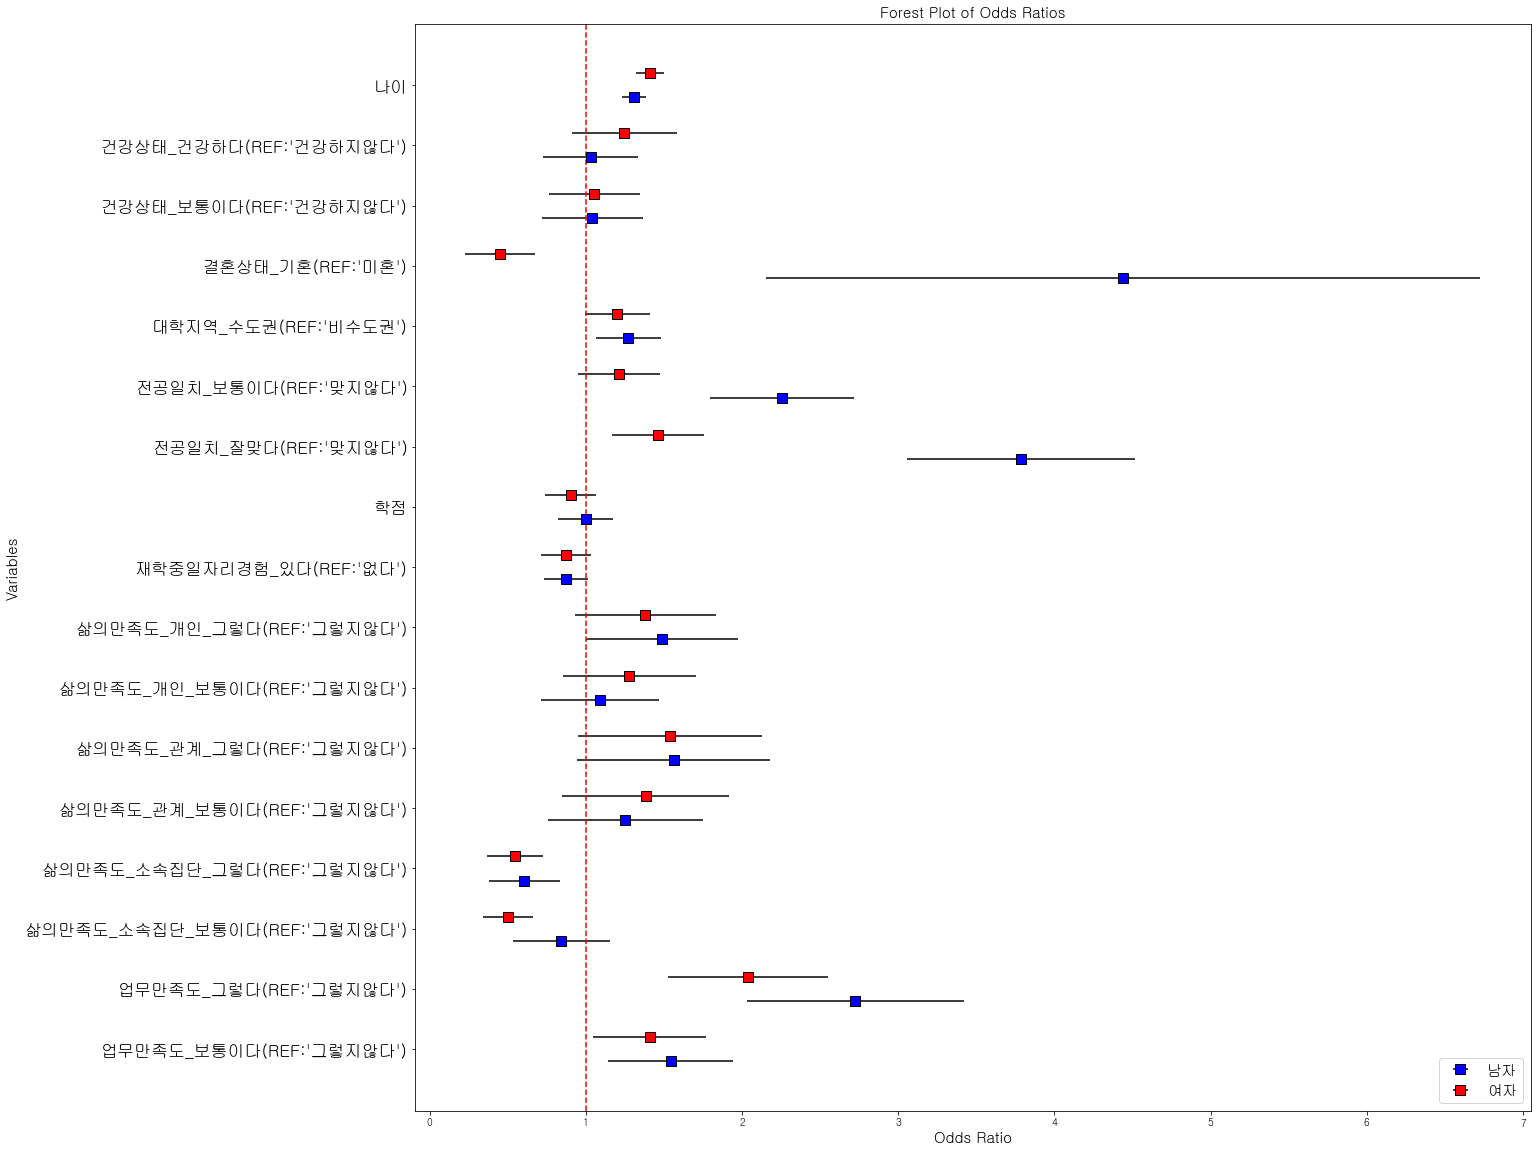

In [23]:
# Define the desired order of variables for men
var_order = ['남자_나이', "남자_건강상태_건강하다(REF:'건강하지않다')",
       "남자_건강상태_보통이다(REF:'건강하지않다')",
       "남자_결혼상태_기혼(REF:'미혼')", "남자_대학지역_수도권(REF:'비수도권')",
       "남자_전공일치_보통이다(REF:'맞지않다')",
       "남자_전공일치_잘맞다(REF:'맞지않다')",
       '남자_학점', "남자_재학중일자리경험_있다(REF:'없다')",
       "남자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "남자_업무만족도_그렇다(REF:'그렇지않다')",
       "남자_업무만족도_보통이다(REF:'그렇지않다')"]

# Define the desired order of variables for women
var_order2 = ['여자_나이', "여자_건강상태_건강하다(REF:'건강하지않다')",
       "여자_건강상태_보통이다(REF:'건강하지않다')",
       "여자_결혼상태_기혼(REF:'미혼')", "여자_대학지역_수도권(REF:'비수도권')",
       "여자_전공일치_보통이다(REF:'맞지않다')",
       "여자_전공일치_잘맞다(REF:'맞지않다')",
       '여자_학점', "여자_재학중일자리경험_있다(REF:'없다')",
       "여자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "여자_업무만족도_그렇다(REF:'그렇지않다')",
       "여자_업무만족도_보통이다(REF:'그렇지않다')"]

var_order_reversed = var_order[::-1]
var_order2_reversed = var_order2[::-1]

# Define the data in the desired order
data_man = [(var, odds_ratios_3_man.loc[var, "OR"], odds_ratios_3_man.loc[var, "Lower CI"],
             odds_ratios_3_man.loc[var, "Upper CI"]) for var in var_order_reversed]
data_woman = [(var, odds_ratios_3_lady.loc[var, "OR"], odds_ratios_3_lady.loc[var, "Lower CI"],
               odds_ratios_3_lady.loc[var, "Upper CI"]) for var in var_order2_reversed]
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the data for males
ax.errorbar([x[1] for x in data_man], [i-0.2 for i in range(len(data_man))], xerr=[x[1] - x[2] for x in data_man], fmt='s',
             color='black', 
             markersize=10, markerfacecolor='blue', label='남자')

# Plot the data for females
ax.errorbar([x[1] for x in data_woman], [i+0.2 for i in range(len(data_woman))], xerr=[x[1] - x[2] for x in data_woman], fmt='s',
             color='black', 
             markersize=10, markerfacecolor='red', label='여자')

# Add the vertical line
ax.axvline(x=1, color='red', linestyle='--')

# yticks label value list
y_label = ['나이', "건강상태_건강하다(REF:'건강하지않다')",
       "건강상태_보통이다(REF:'건강하지않다')",
       "결혼상태_기혼(REF:'미혼')", "대학지역_수도권(REF:'비수도권')",
       "전공일치_보통이다(REF:'맞지않다')",
       "전공일치_잘맞다(REF:'맞지않다')",
       '학점', "재학중일자리경험_있다(REF:'없다')",
       "삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "업무만족도_그렇다(REF:'그렇지않다')",
       "업무만족도_보통이다(REF:'그렇지않다')"]

y_reversed = y_label[::-1]
# Add the labels and title
ax.set_yticks([i for i in range(len(y_reversed))])
ax.set_yticklabels(y_reversed, fontsize=17)
ax.set_xlabel('Odds Ratio', fontsize=15)
ax.set_ylabel('Variables', fontsize=15)
ax.set_title('Forest Plot of Odds Ratios', fontsize= 15)

# Add legend
ax.legend(loc='lower right', fontsize=15)

# Show the plot
plt.show()

##### forest plot package

In [16]:
# Define the desired order of variables for men
var_order = ['남자_나이', "남자_건강상태_건강하다(REF:'건강하지않다')",
       "남자_건강상태_보통이다(REF:'건강하지않다')",
       "남자_결혼상태_기혼(REF:'미혼')", "남자_대학지역_수도권(REF:'비수도권')",
       "남자_전공일치_보통이다(REF:'맞지않다')",
       "남자_전공일치_잘맞다(REF:'맞지않다')",
       '남자_학점', "남자_재학중일자리경험_있다(REF:'없다')",
       "남자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "남자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "남자_업무만족도_그렇다(REF:'그렇지않다')",
       "남자_업무만족도_보통이다(REF:'그렇지않다')"]

# Define the desired order of variables for women
var_order2 = ['여자_나이', "여자_건강상태_건강하다(REF:'건강하지않다')",
       "여자_건강상태_보통이다(REF:'건강하지않다')",
       "여자_결혼상태_기혼(REF:'미혼')", "여자_대학지역_수도권(REF:'비수도권')",
       "여자_전공일치_보통이다(REF:'맞지않다')",
       "여자_전공일치_잘맞다(REF:'맞지않다')",
       '여자_학점', "여자_재학중일자리경험_있다(REF:'없다')",
       "여자_삶의만족도_개인_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_개인_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_관계_보통이다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_그렇다(REF:'그렇지않다')",
       "여자_삶의만족도_소속집단_보통이다(REF:'그렇지않다')",
       "여자_업무만족도_그렇다(REF:'그렇지않다')",
       "여자_업무만족도_보통이다(REF:'그렇지않다')"]

var_order_reversed = var_order[::-1]
var_order2_reversed = var_order2[::-1]

# Define the data in the desired order
data_man = [(var, odds_ratios_3_man.loc[var, "OR"], odds_ratios_3_man.loc[var, "Lower CI"],
             odds_ratios_3_man.loc[var, "Upper CI"]) for var in var_order_reversed]
data_woman = [(var, odds_ratios_3_lady.loc[var, "OR"], odds_ratios_3_lady.loc[var, "Lower CI"],
               odds_ratios_3_lady.loc[var, "Upper CI"]) for var in var_order2_reversed]

# Define variable labels in the same order
var_labels = [odds_ratios_3_man.loc[var, "Value"] for var in var_order_reversed] + [odds_ratios_3_lady.loc[var, "Variable"] for var in var_order2_reversed]

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the forest plot
fp.forestplot(data_man + data_woman,
              ax=ax,
              estimate="OR",
              varlabel=var_labels,
              group_order=["Men", "Women"],
              groupvar="Sex",
              pval=None,
              sort=True,
              table=False,
              xticks=[0.5, 1, 1.5, 2],
              xlabel="Odds Ratio",
              xlim=(0.4, 2.2),
              annote=["Lower CI", "Upper CI"],
              annote_fmt="{:.2f}",
              rightannote=None,
              marker="s",
              markersize=10,
              markerfacecolor=["blue"] * 5 + ["red"] * 5,
              markeredgecolor="black",
              markeredgewidth=0.5
             )

# Add the vertical line
ax.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
ax.set_yticks([i for i in range(len(data_man) + len(data_woman))])
ax.set_yticklabels(var_labels, fontsize=17)
ax.set_xlabel('Odds Ratio', fontsize=15)
ax.set_ylabel('Variables', fontsize=15)
ax.set_title('Forest Plot of Odds Ratios by Sex', fontsize=15)

# Add legend
ax.legend(loc='lower right', fontsize=15)

# Show the plot
plt.show()

KeyError: "남자_업무만족도_보통이다(REF:'그렇지않다')"

In [45]:
odds_ratios_3.index

Index(['Intercept', '나이', '성별_여자(REF:'남자')', '건강상태_건강하다(REF:'건강하지않다')',
       '건강상태_보통이다(REF:'건강하지않다')', '결혼상태_기혼(REF:'미혼')', '대학지역_수도권(REF:'비수도권')',
       '전공일치_보통이다(REF:'맞지않다')', '전공일치_잘맞다(REF:'맞지않다')', '학점',
       '재학중일자리경험_있다(REF:'없다')', '삶의만족도_개인_그렇다(REF:'그렇지않다')',
       '삶의만족도_개인_보통이다(REF:'그렇지않다')', '삶의만족도_관계_그렇다(REF:'그렇지않다')',
       '삶의만족도_관계_보통이다(REF:'그렇지않다')', '삶의만족도_소속집단_그렇다(REF:'그렇지않다')',
       '삶의만족도_소속집단_보통이다(REF:'그렇지않다')', '업무만족도_그렇다(REF:'그렇지않다')',
       '업무만족도_보통이다(REF:'그렇지않다')'],
      dtype='object')

In [ ]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

In [ ]:
odds_ratios_3 = pd.DataFrame({'OR': model_3.params.values[1:],
                              'CI': np.exp(model_3.conf_int()[1:]),
                              '성별': ['남자', '여자']})


In [ ]:
# Create a column for gender
odds_ratios_3['subgroup'] = np.where(df_1['성별'] == 1, '남자', '여자')

# Define the variable labels
var_labels = {"Intercept": "Intercept",
              "나이": "나이",
              "성별_여자(REF:'남자')": "성별",
              "건강상태_보통이다(REF:'건강하지않다')": "건강상태",
              "건강상태_건강하다(REF:'건강하지않다')": "건강상태",
              "결혼상태_기혼(REF:'미혼')": "결혼상태",
              "대학지역_수도권(REF:'비수도권')": "대학지역",
              "전공일치_보통이다(REF:'맞지않다')": "전공일치",
              "전공일치_잘맞다(REF:'맞지않다')": "전공일치",
              "학점": "학점",
              "재학중일자리경험_있다(REF:'없다')": "재학중일자리경험",
              "삶의만족도_개인_보통이다(REF:'그렇지않다')": "삶의만족도_개인",
              "삶의만족도_개인_그렇다(REF:'그렇지않다')": "삶의만족도_개인",
              "삶의만족도_관계_보통이다(REF:'그렇지않다')": "삶의만족도_관계",
              "삶의만족도_관계_그렇다(REF:'그렇지않다')": "삶의만족도_관계",
              "삶의만족도_소속집단_보통이다(REF:'그렇지않다')": "삶의만족도_소속집단",
              "삶의만족도_소속집단_그렇다(REF:'그렇지않다')": "삶의만족도_소속집단",
              "업무만족도_보통이다(REF:'그렇지않다')": "업무만족도",
              "업무만족도_그렇다(REF:'그렇지않다')": "업무만족도"}

# Create the data frame for the forest plot
data = pd.DataFrame({'estimate': odds_ratios_3['OR'],
                     'lower_ci': odds_ratios_3['Lower CI'],
                     'upper_ci': odds_ratios_3['Upper CI'],
                     'varlabel': odds_ratios_3.index.map(var_labels),
                     'subgroup': odds_ratios_3['성별']})

# Create the forest plot
fig, ax = plt.subplots(figsize=(20, 17))
forestplot(data, ax=ax, varname='Odds Ratio', groupname='Subgroup',
           ci_upper='upper_ci', ci_lower='lower_ci', effect='estimate',
           markersize=10, markeredgecolor='black', markeredgewidth=0.5,
           markerfacecolor=['blue', 'red'], xlabel='Odds Ratio', xlim=(0,))
ax.set_title('Forest Plot with Subgroups by 성별')
plt.show()